In [1]:
import os
import torch
from copy import deepcopy
from pytorch_lightning import Trainer, seed_everything

from src.models import PeftModelForSequenceClassification
from src.data import get_datamodule
from src.config import get_config

torch.set_float32_matmul_precision('high')
seed_everything(42)

c:\Users\nikhi\Documents\Projects\LoRA-Ensembling\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 42


42

## Performance Baselines

### SST2, No Constraint

In [2]:
config = get_config("performance_baseline", "sst2")
config.model.init_lora_weights = "state_dicts/lora-bert-sst2_kqv_ALL.pt"

sst2_model = PeftModelForSequenceClassification(config)
sst2_cls = get_datamodule("sst2")
sst2_data = sst2_cls(
    model_name=config.model.model_name,
    batch_size=config.training.batch_size,
    num_workers=config.data.num_workers,
)
sst2_data.prepare_data()
sst2_data.setup()

trainer = Trainer(
        max_epochs=config.training.max_epochs,
        accelerator=config.training.accelerator,
        precision=config.training.precision,
        deterministic=True,
        val_check_interval=config.training.val_check_interval,
    )

2024-06-23 12:37:03.515 | DEBUG    | src.models:__init__:24 - Loading model bert-base-uncased...
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2024-06-23 12:37:04.760 | DEBUG    | src.models:__init__:36 - Creating LoRA model...
2024-06-23 12:37:04.784 | DEBUG    | src.models:__init__:39 - Seeding model parameters...
2024-06-23 12:37:04.785 | DEBUG    | src.models:seed_model_params:47 - Initial weights already exist at `state_dicts/lora-bert-sst2_kqv_ALL.pt`. Loading...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\nikhi\Documents\Projects\LoRA-Ensembling\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector

In [6]:
# Model performance on training data
trainer.validate(sst2_model, dataloaders=sst2_data.train_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\nikhi\Documents\Projects\LoRA-Ensembling\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Validation DataLoader 0: 100%|██████████| 8418/8418 [02:58<00:00, 47.24it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc            0.8725202083587646
        val/loss            0.3071436285972595
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.3071436285972595, 'val/acc': 0.8725202083587646}]

In [3]:
# Model performance on validation data
trainer.validate(sst2_model, dataloaders=sst2_data.val_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 109/109 [00:03<00:00, 33.75it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc            0.8463302850723267
        val/loss            0.3317883610725403
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.3317883610725403, 'val/acc': 0.8463302850723267}]

### CoLA, No Constraint

In [7]:
config = get_config("performance_baseline", "cola")
config.model.init_lora_weights = "state_dicts/lora-bert-cola_kqv_ALL.pt"

cola_model = PeftModelForSequenceClassification(config)
cola_cls = get_datamodule("cola")
cola_data = cola_cls(
    model_name=config.model.model_name,
    batch_size=config.training.batch_size,
    num_workers=config.data.num_workers,
)
cola_data.prepare_data()
cola_data.setup()

trainer = Trainer(
        max_epochs=config.training.max_epochs,
        accelerator=config.training.accelerator,
        precision=config.training.precision,
        deterministic=True,
    )

2024-06-23 12:52:23.478 | DEBUG    | src.models:__init__:24 - Loading model bert-base-uncased...
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2024-06-23 12:52:24.885 | DEBUG    | src.models:__init__:36 - Creating LoRA model...
2024-06-23 12:52:24.907 | DEBUG    | src.models:__init__:39 - Seeding model parameters...
2024-06-23 12:52:24.908 | DEBUG    | src.models:seed_model_params:47 - Initial weights already exist at `state_dicts/lora-bert-cola_kqv_ALL.pt`. Loading...
Map: 100%|██████████| 1043/1043 [00:00<00:00, 26259.09 examples/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [9]:
# Model performance on training data
trainer.validate(cola_model, dataloaders=cola_data.train_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 1068/1068 [00:18<00:00, 56.30it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc            0.9183052778244019
        val/loss            0.23546119034290314
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.23546119034290314, 'val/acc': 0.9183052778244019}]

In [8]:
# Model performance on validation data
trainer.validate(cola_model, dataloaders=cola_data.val_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 130/130 [00:02<00:00, 47.29it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc            0.8144230842590332
        val/loss            0.41714978218078613
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.41714978218078613, 'val/acc': 0.8144230842590332}]

### MNLI, No Constraint

In [10]:
config = get_config("performance_baseline", "mnli")
config.model.init_lora_weights = "state_dicts/lora-bert-mnli_kqv_ALL.pt"

mnli_model = PeftModelForSequenceClassification(config)
mnli_cls = get_datamodule("mnli")
mnli_data = mnli_cls(
    model_name=config.model.model_name,
    batch_size=config.training.batch_size,
    num_workers=config.data.num_workers,
)
mnli_data.prepare_data()
mnli_data.setup()

trainer = Trainer(
        max_epochs=config.training.max_epochs,
        accelerator=config.training.accelerator,
        precision=config.training.precision,
        deterministic=True,
    )

2024-06-23 12:53:49.584 | DEBUG    | src.models:__init__:24 - Loading model bert-base-uncased...
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2024-06-23 12:53:50.229 | DEBUG    | src.models:__init__:36 - Creating LoRA model...
2024-06-23 12:53:50.252 | DEBUG    | src.models:__init__:39 - Seeding model parameters...
2024-06-23 12:53:50.253 | DEBUG    | src.models:seed_model_params:47 - Initial weights already exist at `state_dicts/lora-bert-mnli_kqv_ALL.pt`. Loading...
Map: 100%|██████████| 9832/9832 [00:00<00:00, 12370.20 examples/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [11]:
# Model performance on training data
trainer.validate(mnli_model, dataloaders=mnli_data.train_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0:   1%|          | 416/49088 [00:30<59:40, 13.59it/s]  

c:\Users\nikhi\Documents\Projects\LoRA-Ensembling\.venv\Lib\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [12]:
# Model performance on validation data
trainer.validate(mnli_model, dataloaders=mnli_data.val_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 1: 100%|██████████| 1229/1229 [00:51<00:00, 24.02it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0             DataLoader 1
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     val_matched/acc        0.7426388263702393
    val_matched/loss        0.6197290420532227
   val_mismatched/acc                                0.7571195960044861
   val_mismatched/loss                               0.5963663458824158
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val_matched/loss/dataloader_idx_0': 0.6197290420532227,
  'val_matched/acc/dataloader_idx_0': 0.7426388263702393},
 {'val_mismatched/loss/dataloader_idx_1': 0.5963663458824158,
  'val_mismatched/acc/dataloader_idx_1': 0.7571195960044861}]

## Visualizing LoRAs

### Init weights

In [14]:
import matplotlib.pyplot as plt

def plot_histograms(lora_A, lora_B):
    num_layers = len(lora_A)
    fig, axes = plt.subplots(num_layers, 2, figsize=(8, 3 * num_layers))
    
    for i in range(num_layers):
        # Plot histogram for lora_A
        axes[i, 0].hist(lora_A[i].flatten(), bins=50, alpha=0.7, color='blue')
        axes[i, 0].set_title(f'Layer {i} - LoRA A')
        
        # Plot histogram for lora_B
        axes[i, 1].hist(lora_B[i].flatten(), bins=50, alpha=0.7, color='green')
        axes[i, 1].set_title(f'Layer {i} - LoRA B')
    
    plt.tight_layout()
    plt.show()
    

def plot_heatmaps(lora_A, lora_B):
    num_layers = len(lora_A)
    fig, axes = plt.subplots(num_layers, 1, figsize=(8, 3 * num_layers))
    
    for i in range(num_layers):
        # Plot heatmap for lora_A
        im1 = axes[i].imshow(lora_B[i]@lora_A[i], cmap='hot', interpolation='nearest')
        axes[i].set_title(f'Layer {i} - LoRA_B x LoRA_A')
        fig.colorbar(im1, ax=axes[i])
            
    plt.tight_layout()
    plt.show()

In [19]:
def plot_histograms_comparison(lora_A_task1, lora_B_task1, lora_A_task2, lora_B_task2):
    num_layers = len(lora_A_task1)
    fig, axes = plt.subplots(num_layers, 4, figsize=(24, 4 * num_layers))
    
    for i in range(num_layers):
        # Plot histogram for lora_A_task1
        axes[i, 0].hist(lora_A_task1[i].flatten(), bins=50, alpha=0.7, color='blue')
        axes[i, 0].set_title(f'Task 1 - Layer {i} - LoRA A')
        
        # Plot histogram for lora_B_task1
        axes[i, 1].hist(lora_B_task1[i].flatten(), bins=50, alpha=0.7, color='green')
        axes[i, 1].set_title(f'Task 1 - Layer {i} - LoRA B')
        
        # Plot histogram for lora_A_task2
        axes[i, 2].hist(lora_A_task2[i].flatten(), bins=50, alpha=0.7, color='red')
        axes[i, 2].set_title(f'Task 2 - Layer {i} - LoRA A')
        
        # Plot histogram for lora_B_task2
        axes[i, 3].hist(lora_B_task2[i].flatten(), bins=50, alpha=0.7, color='purple')
        axes[i, 3].set_title(f'Task 2 - Layer {i} - LoRA B')
    
    plt.tight_layout()
    plt.show()


In [1]:
from src.utils import get_lora_matrices, get_cosine_similarities, get_euclidian_distances

init_sdict = get_lora_matrices("state_dicts/lora-bert_kqv_INIT.pt")
sst2_sdict = get_lora_matrices("state_dicts/lora-bert-sst2_kqv_ALL.pt")
cola_sdict = get_lora_matrices("state_dicts/lora-bert-cola_kqv_ALL.pt")

c:\Users\nikhi\Documents\Projects\LoRA-Ensembling\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(f"Cosine similarity between INIT and SST2: {get_cosine_similarities(init_sdict, sst2_sdict)}")
print(f"Cosine similarity between INIT and CoLA: {get_cosine_similarities(init_sdict, cola_sdict)}")

Cosine similarity between INIT and SST2: {'key.lora_A': tensor([0.9446, 0.9054, 0.9280, 0.9411, 0.9550, 0.9477, 0.9061, 0.9037, 0.8777,
        0.9274, 0.7042, 0.9096]), 'key.lora_B': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'value.lora_A': tensor([0.8754, 0.7746, 0.7411, 0.8434, 0.9368, 0.8624, 0.7792, 0.9339, 0.8173,
        0.8957, 0.8545, 0.9081]), 'value.lora_B': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'query.lora_A': tensor([0.9395, 0.9399, 0.9106, 0.9434, 0.9369, 0.9400, 0.8915, 0.8721, 0.9227,
        0.8670, 0.8538, 0.8343]), 'query.lora_B': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}
Cosine similarity between INIT and CoLA: {'key.lora_A': tensor([0.5139, 0.3950, 0.3471, 0.5004, 0.5430, 0.5787, 0.5415, 0.3988, 0.5231,
        0.5397, 0.6220, 0.3858]), 'key.lora_B': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'value.lora_A': tensor([0.6142, 0.6552, 0.5565, 0.5770, 0.5876, 0.6432, 0.6808, 0.6778, 0.5834,
        0.69

In [3]:
print(f"Euclidian distance between INIT and SST2: {get_euclidian_distances(init_sdict, sst2_sdict)}")
print(f"Euclidian distance between INIT and CoLA: {get_euclidian_distances(init_sdict, cola_sdict)}")

Euclidian distance between INIT and SST2: {'key.lora_A': tensor(1.2668), 'key.lora_B': tensor(0.2928), 'value.lora_A': tensor(1.0846), 'value.lora_B': tensor(0.6614), 'query.lora_A': tensor(1.2771), 'query.lora_B': tensor(0.3316)}
Euclidian distance between INIT and CoLA: {'key.lora_A': tensor(2.4015), 'key.lora_B': tensor(2.1734), 'value.lora_A': tensor(2.0095), 'value.lora_B': tensor(1.7993), 'query.lora_A': tensor(2.3159), 'query.lora_B': tensor(2.1190)}


## Stacking SST2 & CoLA LoRAs

In [59]:
sst2_dict = torch.load("state_dicts/lora-bert-sst2_kqv_ALL.pt")
cola_dict = torch.load("state_dicts/lora-bert-cola_kqv_ALL.pt")

sst2_cola_lora_dict = deepcopy(sst2_dict)
cola_sst2_lora_dict = deepcopy(cola_dict)

keys = list(sst2_dict.keys())

# Concatenate LoRA matrices for SST2 and CoLA
for key in keys:
    if "lora_A" in key:
        sst2_cola_lora_dict[key] = torch.cat([sst2_dict[key].cpu(), cola_dict[key].cpu()], dim=0)
        cola_sst2_lora_dict[key] = torch.cat([cola_dict[key].cpu(), sst2_dict[key].cpu()], dim=0)
    elif "lora_B" in key:
        sst2_cola_lora_dict[key] = torch.cat([sst2_dict[key].cpu(), cola_dict[key].cpu()], dim=1)
        cola_sst2_lora_dict[key] = torch.cat([cola_dict[key].cpu(), sst2_dict[key].cpu()], dim=1)
    else:
        sst2_cola_lora_dict.pop(key)
        cola_sst2_lora_dict.pop(key)


# Separate the classifier heads for SST2 and CoLA
sst2_cls_dict = deepcopy(sst2_dict)
cola_cls_dict = deepcopy(cola_dict)

for key in keys:
    if "classifier" not in key:
        sst2_cls_dict.pop(key)
        cola_cls_dict.pop(key)


In [60]:
torch.save(sst2_cola_lora_dict, "state_dicts/lora-bert-sst2_cola_kqv_LORA.pt")
torch.save(cola_sst2_lora_dict, "state_dicts/lora-bert-cola_sst2_kqv_LORA.pt")
torch.save(sst2_cls_dict, "state_dicts/lora-bert-sst2_cls.pt")
torch.save(cola_cls_dict, "state_dicts/lora-bert-cola_cls.pt")

## Performance with stacked LoRAs [No further training]

In [68]:
sst2_baseline = {'train/loss': 0.3071436285972595, 'train/acc': 0.8725202083587646,
                 'val/loss': 0.3317883610725403, 'val/acc': 0.8463302850723267}

cola_baseline = {'train/loss': 0.23546119034290314, 'train/acc': 0.9183052778244019,
                 'val/loss': 0.41714978218078613, 'val/acc': 0.8144230842590332}

In [61]:
config = get_config("performance_stacked_loras-no_training", "sst2")

sst2_cls = get_datamodule("sst2")
sst2_data = sst2_cls(
    model_name=config.model.model_name,
    batch_size=config.training.batch_size,
    num_workers=config.data.num_workers,
)
sst2_data.prepare_data()
sst2_data.setup()

cola_cls = get_datamodule("cola")
cola_data = cola_cls(
    model_name=config.model.model_name,
    batch_size=config.training.batch_size,
    num_workers=config.data.num_workers,
)
cola_data.prepare_data()
cola_data.setup()

### Exp 01: 
- No further training
- Rank #1: Trained SST2 LoRA weights
- Rank #2: Trained CoLA LoRA weights
- Classifier head: Trained SST2's classifier head
- Evaluated on: SST2 dataset

In [65]:
lora_weights = "state_dicts/lora-bert-sst2_cola_kqv_LORA.pt"
cls_weights = "state_dicts/lora-bert-sst2_cls.pt"

config.lora.r = 2
config.model.init_lora_weights = lora_weights

sst2_cola_model = PeftModelForSequenceClassification(config)
sst2_cola_model.load_state_dict(torch.load(lora_weights), strict=False)
sst2_cola_model.load_state_dict(torch.load(cls_weights), strict=False)

trainer = Trainer(
    accelerator=config.training.accelerator,
    precision=config.training.precision,
    deterministic=True,
)

2024-06-23 17:51:12.543 | DEBUG    | src.models:__init__:24 - Loading model bert-base-uncased...
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2024-06-23 17:51:13.067 | DEBUG    | src.models:__init__:36 - Creating LoRA model...
2024-06-23 17:51:13.086 | DEBUG    | src.models:__init__:39 - Seeding model parameters...
2024-06-23 17:51:13.087 | DEBUG    | src.models:seed_model_params:47 - Initial weights already exist at `state_dicts/lora-bert-sst2_cola_kqv_LORA.pt`. Loading...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [66]:
# Model performance on training data
print("SST2 Model Performance on Training Data")
trainer.validate(sst2_cola_model, dataloaders=sst2_data.train_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SST2 Model Performance on Training Data


c:\Users\nikhi\Documents\Projects\LoRA-Ensembling\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Validation DataLoader 0: 100%|██████████| 8418/8418 [02:42<00:00, 51.79it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc            0.7876425385475159
        val/loss            0.47551482915878296
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.47551482915878296, 'val/acc': 0.7876425385475159}]

In [67]:
# Model performance on validation data
print("SST2 Model Performance on Validation Data")
trainer.validate(sst2_cola_model, dataloaders=sst2_data.val_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SST2 Model Performance on Validation Data
Validation DataLoader 0: 100%|██████████| 109/109 [00:02<00:00, 52.20it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc            0.7763761281967163
        val/loss             0.491356760263443
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.491356760263443, 'val/acc': 0.7763761281967163}]

In [69]:
sst2_cola_performance_on_sst2 = {'train/loss': 0.47551482915878296, 'train/acc': 0.7876425385475159,
                            'val/loss': 0.491356760263443, 'val/acc': 0.7763761281967163}

### Exp 02: 
- No further training
- Rank #1: Trained SST2 LoRA weights
- Rank #2: Trained CoLA LoRA weights
- Classifier head: Trained CoLA's classifier head
- Evaluated on: CoLA dataset

In [70]:
cls_weights = "state_dicts/lora-bert-cola_cls.pt"

sst2_cola_model.load_state_dict(torch.load(cls_weights), strict=False)

# Model performance on training data
print("CoLA Model Performance on Training Data")
trainer.validate(sst2_cola_model, dataloaders=cola_data.train_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


CoLA Model Performance on Training Data


c:\Users\nikhi\Documents\Projects\LoRA-Ensembling\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
c:\Users\nikhi\Documents\Projects\LoRA-Ensembling\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


Validation DataLoader 0: 100%|██████████| 1068/1068 [00:16<00:00, 64.65it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc             0.76170414686203
        val/loss            0.5107812285423279
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.5107812285423279, 'val/acc': 0.76170414686203}]

In [71]:
# Model performance on validation data
print("CoLA Model Performance on Validation Data")
trainer.validate(sst2_cola_model, dataloaders=cola_data.val_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


CoLA Model Performance on Validation Data
Validation DataLoader 0: 100%|██████████| 130/130 [00:02<00:00, 58.77it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc            0.7365384697914124
        val/loss            0.5675283074378967
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.5675283074378967, 'val/acc': 0.7365384697914124}]

In [72]:
sst2_cola_performance_on_cola = {'train/loss': 0.5107812285423279, 'train/acc': 0.76170414686203,
                                'val/loss': 0.5675283074378967, 'val/acc': 0.7365384697914124}

### Exp 03: 
- No further training
- Rank #1: Trained CoLA LoRA weights
- Rank #2: Trained SST2 LoRA weights
- Classifier head: Trained CoLA's classifier head
- Evaluated on: CoLA dataset

In [74]:
lora_weights = "state_dicts/lora-bert-cola_sst2_kqv_LORA.pt"
cls_weights = "state_dicts/lora-bert-cola_cls.pt"

config.lora.r = 2
config.model.init_lora_weights = lora_weights

cola_sst2_model = PeftModelForSequenceClassification(config)
cola_sst2_model.load_state_dict(torch.load(lora_weights), strict=False)
cola_sst2_model.load_state_dict(torch.load(cls_weights), strict=False)

# Model performance on training data
print("CoLA Model Performance on Training Data")
trainer.validate(cola_sst2_model, dataloaders=cola_data.train_dataloader())

2024-06-23 18:07:02.852 | DEBUG    | src.models:__init__:24 - Loading model bert-base-uncased...
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2024-06-23 18:07:04.858 | DEBUG    | src.models:__init__:36 - Creating LoRA model...
2024-06-23 18:07:04.875 | DEBUG    | src.models:__init__:39 - Seeding model parameters...
2024-06-23 18:07:04.875 | DEBUG    | src.models:seed_model_params:47 - Initial weights already exist at `state_dicts/lora-bert-cola_sst2_kqv_LORA.pt`. Loading...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


CoLA Model Performance on Training Data
Validation DataLoader 0:  46%|████▌     | 490/1068 [01:07<01:19,  7.28it/s]
Validation: |          | 1068/? [00:17<00:00, 61.79it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc            0.7618211507797241
        val/loss             0.510724663734436
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.510724663734436, 'val/acc': 0.7618211507797241}]

In [75]:
# Model performance on validation data
print("CoLA Model Performance on Validation Data")
trainer.validate(cola_sst2_model, dataloaders=cola_data.val_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


CoLA Model Performance on Validation Data


c:\Users\nikhi\Documents\Projects\LoRA-Ensembling\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


Validation DataLoader 0: 100%|██████████| 130/130 [00:02<00:00, 49.66it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc            0.7365384697914124
        val/loss            0.5675283074378967
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.5675283074378967, 'val/acc': 0.7365384697914124}]

In [76]:
cola_sst2_performance_on_cola = {'train/loss': 0.510724663734436, 'train/acc': 0.7618211507797241,
                                 'val/loss': 0.5675283074378967, 'val/acc': 0.7365384697914124}


### Exp 04: 
- No further training
- Rank #1: Trained CoLA LoRA weights
- Rank #2: Trained SST2 LoRA weights
- Classifier head: Trained SST2's classifier head
- Evaluated on: SST2 dataset

In [77]:
cls_weights = "state_dicts/lora-bert-sst2_cls.pt"

cola_sst2_model.load_state_dict(torch.load(cls_weights), strict=False)

# Model performance on training data
print("SST2 Model Performance on Training Data")
trainer.validate(cola_sst2_model, dataloaders=sst2_data.train_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SST2 Model Performance on Training Data


c:\Users\nikhi\Documents\Projects\LoRA-Ensembling\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Validation DataLoader 0: 100%|██████████| 8418/8418 [02:35<00:00, 54.16it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc             0.787672221660614
        val/loss            0.47552019357681274
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.47552019357681274, 'val/acc': 0.787672221660614}]

In [78]:
# Model performance on validation data
print("SST2 Model Performance on Validation Data")
trainer.validate(cola_sst2_model, dataloaders=sst2_data.val_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SST2 Model Performance on Validation Data
Validation DataLoader 0: 100%|██████████| 109/109 [00:02<00:00, 48.48it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val/acc            0.7763761281967163
        val/loss             0.491356760263443
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val/loss': 0.491356760263443, 'val/acc': 0.7763761281967163}]

In [ ]:
cola_sst2_performance_on_sst2 = {'train/loss': 0.47552019357681274, 'train/acc': 0.787672221660614,
                                 'val/loss': 0.491356760263443, 'val/acc': 0.7763761281967163}

### Performance difference from the baseline

In [93]:
import matplotlib.pyplot as plt

sst2_baseline = {'train/loss': 0.3071436285972595, 'train/acc': 0.8725202083587646,
                 'val/loss': 0.3317883610725403, 'val/acc': 0.8463302850723267}

cola_baseline = {'train/loss': 0.23546119034290314, 'train/acc': 0.9183052778244019,
                 'val/loss': 0.41714978218078613, 'val/acc': 0.8144230842590332}

sst2_cola_performance_on_sst2 = {'train/loss': 0.47551482915878296, 'train/acc': 0.7876425385475159,
                            'val/loss': 0.491356760263443, 'val/acc': 0.7763761281967163}

sst2_cola_performance_on_cola = {'train/loss': 0.5107812285423279, 'train/acc': 0.76170414686203,
                                'val/loss': 0.5675283074378967, 'val/acc': 0.7365384697914124}

cola_sst2_performance_on_cola = {'train/loss': 0.510724663734436, 'train/acc': 0.7618211507797241,
                                 'val/loss': 0.5675283074378967, 'val/acc': 0.7365384697914124}


cola_sst2_performance_on_sst2 = {'train/loss': 0.47552019357681274, 'train/acc': 0.787672221660614,
                                 'val/loss': 0.491356760263443, 'val/acc': 0.7763761281967163}

def plot_metric_comparison(baseline, stacked_perf, title):
    groups = ["train/loss", "train/acc", "val/loss", "val/acc"]
    data = {
        "Baseline": [baseline["train/loss"], baseline["train/acc"], baseline["val/loss"], baseline["val/acc"]],
        "Stacked_LoRA": [stacked_perf["train/loss"], stacked_perf["train/acc"], stacked_perf["val/loss"], stacked_perf["val/acc"]],
    }
    
    x = range(len(groups))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for i, (label, values) in enumerate(data.items()):
        ax.bar([j + width * i for j in x], values, width=width, label=label)
        
    ax.set_xticks([j + width / 2 for j in x])
    ax.set_xticklabels(groups)
    ax.set_title(title)
    ax.grid()
    ax.legend()
    
    plt.show()

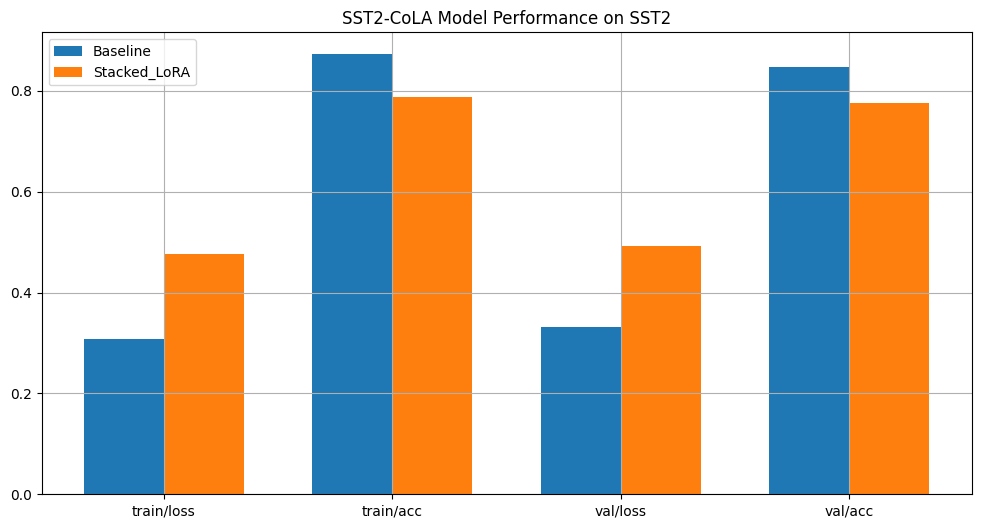

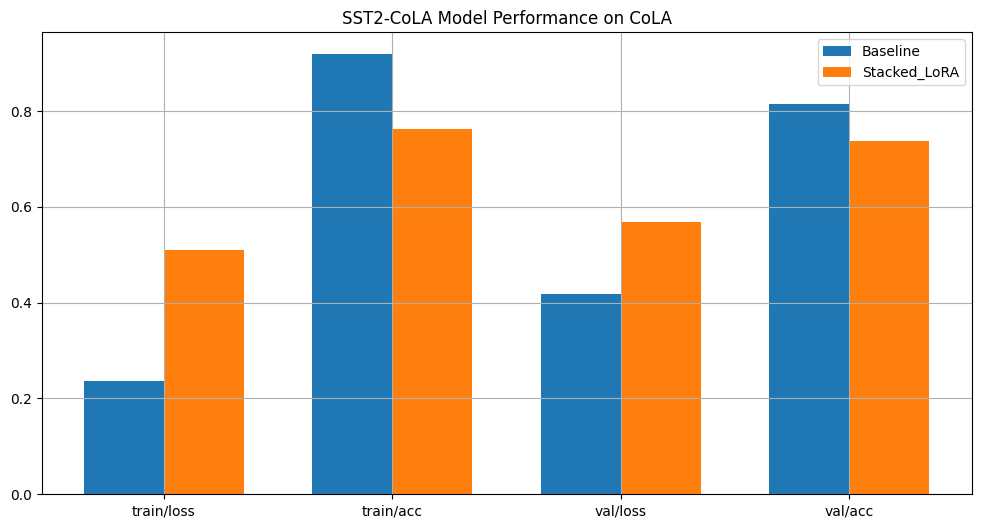

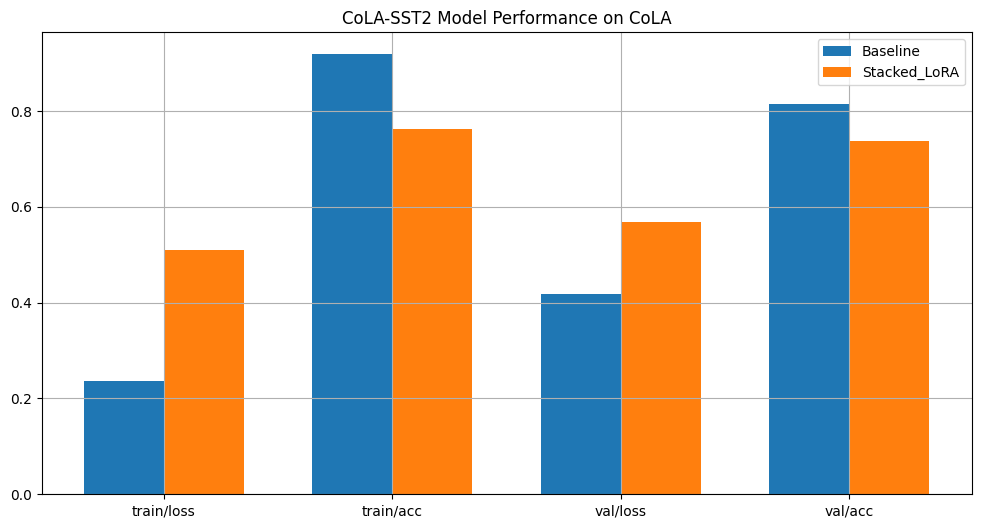

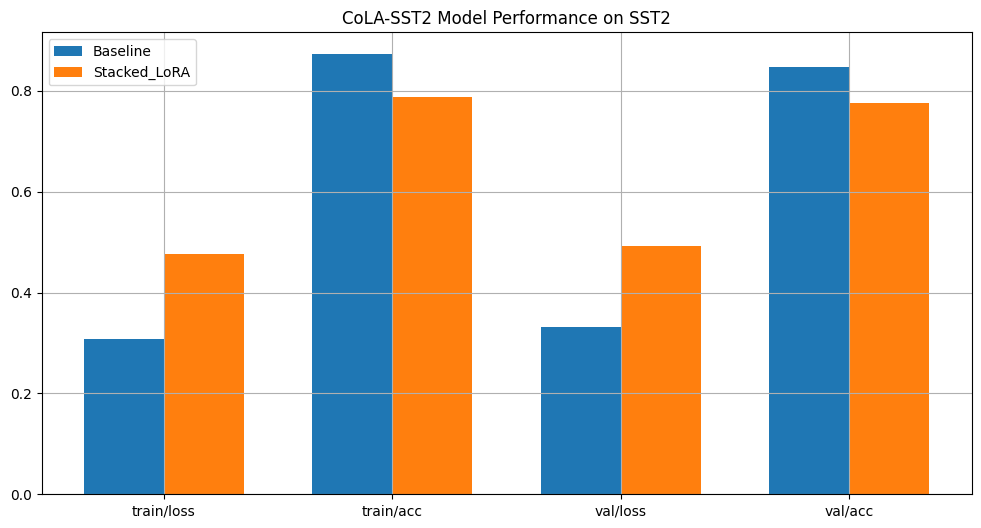

In [95]:
plot_metric_comparison(sst2_baseline, sst2_cola_performance_on_sst2, "SST2-CoLA Model Performance on SST2")
plot_metric_comparison(cola_baseline, sst2_cola_performance_on_cola, "SST2-CoLA Model Performance on CoLA")
plot_metric_comparison(cola_baseline, cola_sst2_performance_on_cola, "CoLA-SST2 Model Performance on CoLA")
plot_metric_comparison(sst2_baseline, cola_sst2_performance_on_sst2, "CoLA-SST2 Model Performance on SST2")